# **Análisis exploratorio conjuntos de datos:**

A continuación, se detallan los conjuntos de datos que se van a utilizar para la creación, entrenamiento y validación del modelo de Machine Learning. Estos consisten en los siguientes, con sus respectivos orígenes:

- [Climatic Prediction Center](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php).
    - [Índice Oceánico del Niño](https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt).
- [Parámetros técnicos del SIN (PARATEC)](https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt).
    - [Información técnica de Embalses](https://paratecbackend.xm.com.co/reportehidrologia/api/Hydrology/ReservoirInfo).
- [Sistema de Información para el Mercado de Energía Mayorista](https://www.simem.co/).
    - [Listado de Embalses que sirven al Sistema Interconectado Nacional](https://www.simem.co/datadetail/A0CF2AC0-ACEA-4154-A4DE-2928901CB5D0).
    - [Reservas Hidráulicas en Energía](https://www.simem.co/datadetail/B0E93334-D812-42A7-94FC-3F100BCE7038).
    - [Aportes Hídricos en Energía](https://www.simem.co/datadetail/BA1C5513-7DC3-4155-9DE9-D262863B31F3).

Para cada uno de estos se realizará un análisis exploratorio de sus variables categóricas y numéricas.


## **Climatic Prediction Center**

### **Indice Oceanico del Niño:**

| Columna | Descripción | Tipo de dato |
|---------|-------------|--------------|
|   Date  |  Fecha intermedia donde se calculo el valor del SST           |     Date         |
|   SST   |  Promedio movil de tres meses consecutivos de la temperatura superficial del mar en la zona de analisis del fenomeno del niño  |       float       |
|   ANOM  |  Indice ocenico del Niño que es el promedio de anomalías de temperatura en tres meses consecutivos   |  float            |


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data = pd.read_excel("D:\mis documentos\Personal\Repos\JSSL-INV-FUNC-BACKEND\Data\ONI\ONI_historico.xlsx")

# Mostrar las primeras filas del DataFrame
data.head()


,Date,SST,ANOM
0,1950-01-01,24.72,-1.53
1,1950-02-01,25.17,-1.34
2,1950-03-01,25.75,-1.16
3,1950-04-01,26.12,-1.18
4,1950-05-01,26.32,-1.07


In [26]:
# Imprimir el resumen del DataFrame
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    903 non-null    datetime64[ns]
 1   SST     903 non-null    float64       
 2   ANOM    903 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB
None
                                Date         SST        ANOM
count                            903  903.000000  903.000000
mean   1987-08-01 11:44:51.029900352   26.904352    0.012315
min              1950-01-01 00:00:00   24.380000   -2.030000
25%              1968-10-16 12:00:00   26.230000   -0.570000
50%              1987-08-01 00:00:00   26.950000   -0.050000
75%              2006-05-16 12:00:00   27.540000    0.530000
max              2025-03-01 00:00:00   29.260000    2.640000
std                              NaN    0.942695    0.835370


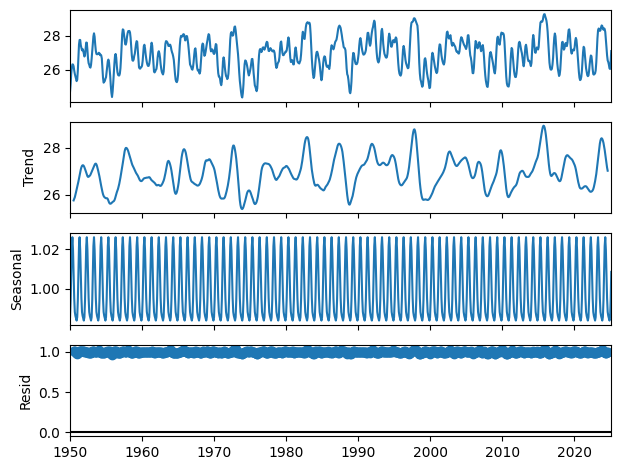

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
decomposition = seasonal_decompose(data[['Date','SST']].set_index('Date'), model='multiplicative')
decomposition.plot()
plt.show()


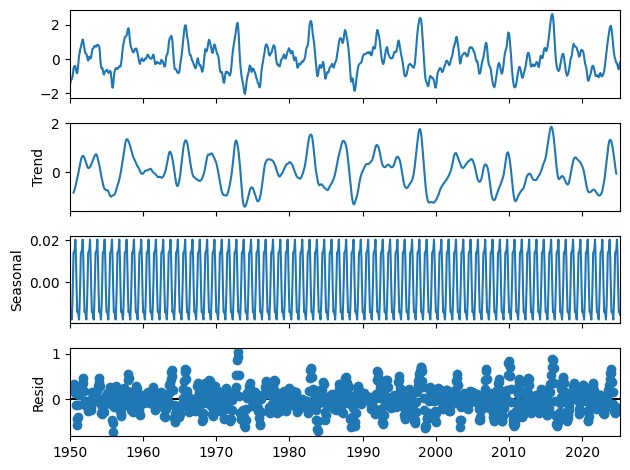

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal es aditiva dado a que tiene el cero
decomposition = seasonal_decompose(data[['Date','ANOM']].set_index('Date'), model='additive')
decomposition.plot()
plt.show()

## **Parámetros técnicos del SIN (PARATEC):**

### **Información técnica de Embalses:**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel("D:\mis documentos\Personal\Repos\JSSL-INV-FUNC-BACKEND\Data\PARAREC\PARATEC_2025-05-14.xlsx")

# Display the first few rows of the DataFrame
data.head()


,reservoir,isReservoirAggregate,latitude,longitude
0,ESMERALDA,0,4.900000,-73.300000
1,CALIMA,0,3.524585,-76.333665
2,PRADO,0,3.451501,-74.531129
3,SALVAJINA,0,2.563915,-76.422730
4,ALTOANCHICAYA,0,3.320507,-76.521748


In [30]:
# Imprimir el resumen del DataFrame
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reservoir             29 non-null     object 
 1   isReservoirAggregate  29 non-null     int64  
 2   latitude              29 non-null     float64
 3   longitude             29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.0+ KB
None
       isReservoirAggregate   latitude  longitude
count                  29.0  29.000000  29.000000
mean                    0.0   5.334562 -74.840935
std                     0.0   1.556431   1.008439
min                     0.0   2.423000 -76.521748
25%                     0.0   4.342150 -75.452425
50%                     0.0   5.370000 -75.139300
75%                     0.0   6.519072 -73.985400
max                     0.0   7.866667 -73.290070


## **Sistema de Información para el Mercado de Energía Mayorista:**

### **Listado de Embalses que sirven al Sistema Interconectado Nacional:**

| Columna | Descripción | Tipo de dato |
|---------|-------------|--------------|
|   CodigoEmbalse  |  Código del embalse           |    str         |
|   NombreEmbalse   |  Nombre de los embalses del sistema interconectado nacional.  |       str       |


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data = pd.read_excel("D:\mis documentos\Personal\Repos\JSSL-INV-FUNC-BACKEND\Data\SIMEM\ListadoEmbalses.xlsx")

# Mostrar las primeras filas del DataFrame
data.head()


,CodigoEmbalse,NombreEmbalse
0,MIRAFLOR,MIRAFLORES
1,AGREGADO_SIN,AGREGADO DEL SIN
2,ALTOANCH,ALTOANCHICAYA
3,CALIMA1,CALIMA
4,ITUANGO,ITUANGO


In [32]:
# Imprimir el resumen del DataFrame
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CodigoEmbalse  36 non-null     object
 1   NombreEmbalse  36 non-null     object
dtypes: object(2)
memory usage: 708.0+ bytes
None
       CodigoEmbalse NombreEmbalse
count             36            36
unique            36            36
top         MIRAFLOR    MIRAFLORES
freq               1             1


### **Reservas Hidráulicas en Energía:**

| Columna | Descripción | Tipo de dato |
|---------|-------------|--------------|
|   Fecha  |  Fecha de representación de la información           |    Date         |
|   CodigoEmbalse   |  Zona geográfica en la cual se agrupan elementos con características hidrológicas similares.  |       str       |
|   RegionHidrologica   |  Código del embalse  |       str       |
|   VolumenUtilDiarioEnergia   |  	Volúmen Útil Diario del Embalse reportado por el agente expresado en energía  |       float       |
|   CapacidadUtilEnergia   |  Es el máximo volumen que puede ser utilizado para la generación de energía en cada embalse. Corresponde a la diferencia entre el volumen máximo técnico y el volumen mínimo técnico.  |       float       |
|   VolumenTotalEnergia   |  	Es el volumen máximo que puede almacenarse en un embalse, bajo condiciones normales de operación. Equivale a la suma de los siguientes volúmenes: volumen de embalse muerto, volumen mínimo técnico y volumen útil del embalse  |       float       |
|   VertimientosEnergia   |  	Vertimientos reportados expresados en energía  |       float       |



#### **Cargar conjuntos de datos:**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data = pd.read_excel("D:\mis documentos\Personal\Repos\JSSL-INV-FUNC-BACKEND\Data\SIMEM\ReservasHidraulicasEnergía.xlsx")
data['Fecha'] = pd.to_datetime(data['Fecha'])
# Mostrar las primeras filas del DataFrame
data.head()

,Fecha,CodigoEmbalse,RegionHidrologica,VolumenUtilDiarioEnergia,CapacidadUtilEnergia,VolumenTotalEnergia,VertimientosEnergia
0,2013-01-31,PORCE2,Antioquia,5139300,133945086,71858700,0.0
1,2013-01-31,MIEL1,Caldas,149497300,235260926,176276000,0.0
2,2013-01-31,MIRAFLOR,Antioquia,138240800,304387239,154204200,0.0
3,2013-01-31,GUAVIO,Oriente,1016278500,2095258858,1066728600,0.0
4,2013-01-31,PRADO,Centro,42426200,59469968,86864600,0.0


#### **Descripción de variables numericas:**

In [63]:
# Imprimir el resumen del DataFrame
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97526 entries, 0 to 97525
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     97526 non-null  datetime64[ns]
 1   CodigoEmbalse             97526 non-null  object        
 2   RegionHidrologica         97526 non-null  object        
 3   VolumenUtilDiarioEnergia  97526 non-null  int64         
 4   CapacidadUtilEnergia      97526 non-null  int64         
 5   VolumenTotalEnergia       97526 non-null  int64         
 6   VertimientosEnergia       97526 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.2+ MB
None
                               Fecha  VolumenUtilDiarioEnergia  \
count                          97526              9.752600e+04   
mean   2019-04-03 13:13:36.299243264              3.990421e+08   
min              2013-01-01 00:00:00             -

#### **Descripción de variables categoricas:**

In [64]:
# Realizar un análisis de las variables cualitativas del DataFrame
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {data[col].unique()}")
    print(f"Número de valores únicos: {data[col].nunique()}")
    print("Frecuencia de aparición de cada valor:")
    print(data[col].value_counts())
    print("\n")


Columna: CodigoEmbalse
Valores únicos: ['PORCE2' 'MIEL1' 'MIRAFLOR' 'GUAVIO' 'PRADO' 'RIOGRAN2' 'MUNA' 'TRONERAS'
 'BETANIA' 'CHUZA' 'SANLOREN' 'ALTOANCH' 'ESMERALD' 'PLAYAS' 'PUNCHINA'
 'URRA1' 'PORCE3' 'SALVAJIN' 'CALIMA1' 'PENOL' 'SOGAMOSO' 'ELQUIMBO'
 'ITUANGO']
Número de valores únicos: 23
Frecuencia de aparición de cada valor:
CodigoEmbalse
PLAYAS      4474
PORCE2      4473
MIEL1       4473
PENOL       4473
CALIMA1     4473
SALVAJIN    4473
PORCE3      4473
URRA1       4473
PUNCHINA    4473
ESMERALD    4473
ALTOANCH    4473
SANLOREN    4473
CHUZA       4473
BETANIA     4473
TRONERAS    4473
MUNA        4473
RIOGRAN2    4473
PRADO       4473
GUAVIO      4473
MIRAFLOR    4473
SOGAMOSO    3774
ELQUIMBO    3439
ITUANGO      852
Name: count, dtype: int64


Columna: RegionHidrologica
Valores únicos: ['Antioquia' 'Caldas' 'Oriente' 'Centro' 'Valle' 'Caribe']
Número de valores únicos: 6
Frecuencia de aparición de cada valor:
RegionHidrologica
Antioquia    41110
Centro       20632
Oriente

#### **Analisis de estacionalidad en la serie de tiempo:**

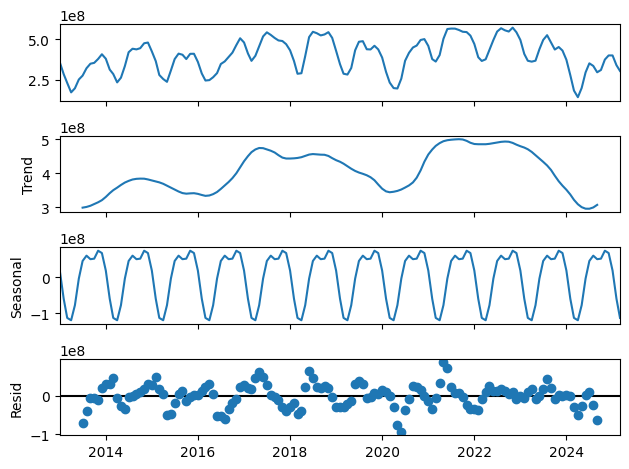

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import date

grouped_data = data.groupby(data['Fecha'].dt.to_period('M')).agg({
    'VolumenUtilDiarioEnergia': 'mean',
    'CapacidadUtilEnergia': 'max',
    'VertimientosEnergia': 'sum',
    'VolumenTotalEnergia': 'sum'
}).reset_index()
grouped_data['Fecha'] = grouped_data['Fecha'].dt.to_timestamp()
decomposition = seasonal_decompose(grouped_data[['Fecha','VolumenUtilDiarioEnergia']].set_index('Fecha'), model='additive')
decomposition.plot()
plt.show()

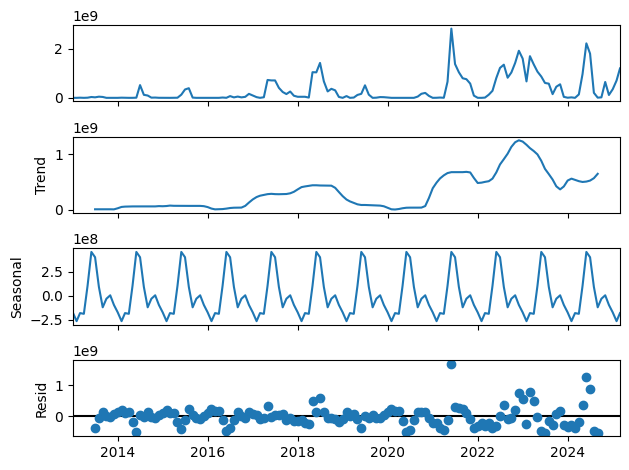

In [36]:
decomposition = seasonal_decompose(grouped_data[['Fecha','VertimientosEnergia']].set_index('Fecha'), model='additive')
decomposition.plot()
plt.show()

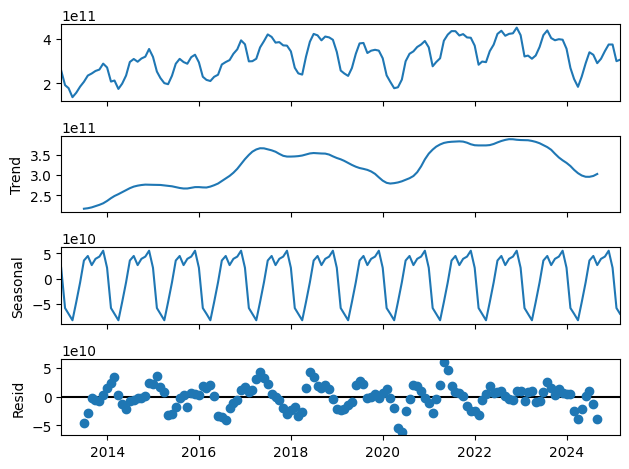

In [37]:
decomposition = seasonal_decompose(grouped_data[['Fecha','VolumenTotalEnergia']].set_index('Fecha'), model='additive')
decomposition.plot()
plt.show()

### **Aportes Hídricos en Energía:**

| Columna | Descripción | Tipo de dato |
|---------|-------------|--------------|
|   Fecha  |  Fecha de representación de la información           |    Date         |
|   CodigoSerieHidrologica   |  Código único para identificar una serie hidrologica o un río del Sistema Interconectado Nacional  |       str       |
|   RegionHidrologica   |  Zona geográfica en la cual se agrupan elementos con características hidrológicas similares.  |       str       |
|   AportesHidricosEnergia   |  	Aporte hídrico asociado con un recurso de generación despachado centralmente. |       float       |
|   PromedioAcumuladoEnergia  |  Aportes hidricos promedio para lo que va corrido del mes.  |       float       |
|   MediaHistoricaEnergia   |  	Promedio mensual multianual de la serie hidrológica aprobada por Acuerdo CNO  |       float       |



##### **Cargar conjuntos de datos de historicos:**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
data = pd.read_excel("D:\mis documentos\Personal\Repos\JSSL-INV-FUNC-BACKEND\Data\SIMEM\AportesHidricos.xlsx")

# Mostrar las primeras filas del DataFrame
data.head()

,Fecha,CodigoSerieHidrologica,RegionHidrologica,AportesHidricosEnergia,PromedioAcumuladoEnergia,MediaHistoricaEnergia
0,2013-05-31,FLR2CAUC,Valle,383400,200000.0,310000.0
1,2013-05-31,URR1SINU,Caribe,4044200,4860000.0,4800000.0
2,2013-05-31,PP-2PORC,Antioquia,16672400,15000000.0,11980000.0
3,2013-05-31,BOCATENC,Antioquia,1107500,1770000.0,2410000.0
4,2013-05-31,PTEHMIEL,Caldas,4996600,5180000.0,4550000.0


#### **Descripción de variables numericas:**

In [49]:
# Imprimir el resumen del DataFrame
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152505 entries, 0 to 152504
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Fecha                     152505 non-null  object 
 1   CodigoSerieHidrologica    152505 non-null  object 
 2   RegionHidrologica         152505 non-null  object 
 3   AportesHidricosEnergia    152505 non-null  int64  
 4   PromedioAcumuladoEnergia  151788 non-null  float64
 5   MediaHistoricaEnergia     152026 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB
None
       AportesHidricosEnergia  PromedioAcumuladoEnergia  MediaHistoricaEnergia
count            1.525050e+05              1.517880e+05           1.520260e+05
mean             9.365653e+06              9.345590e+06           1.008390e+07
std              3.049428e+07              2.929748e+07           3.027412e+07
min              0.000000e+00              0.000000e+00    

#### **Descripción de variables categoricas:**

In [58]:
# Realizar un análisis de las variables cualitativas del DataFrame
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {data[col].unique()}")
    print(f"Número de valores únicos: {data[col].nunique()}")
    print("Frecuencia de aparición de cada valor:")
    print(data[col].value_counts())
    print("\n")


Columna: CodigoSerieHidrologica
Valores únicos: ['FLR2CAUC' 'URR1SINU' 'PP-2PORC' 'BOCATENC' 'PTEHMIEL' 'MIRFTENC'
 'PP-3PORC' 'ALICBOGO' 'ESMEBATA' 'BAJOANCH' 'EMBAPRAD' 'DESVRBLA'
 'AGREGADO_SIN' 'PLAYGUAT' 'RGR2RGRD' 'AMOYAMOY' 'ALTOANCH' 'SALVCAUC'
 'BETAMAGD' 'PUNCGUAT' 'CAL1CALM' 'SLORNARE' 'TRONGUAD' 'DESVIEPM'
 'PENONARE' 'DESVGUAR' 'EMBAGUAV' 'EMBACHUZ' 'DESVMANS' 'SOGASOGA'
 'QUIMMAGD' 'BETAMAG1' 'DESVSMAR' 'CLLRPORC' 'PP-2POR1' 'CUCUCUCU'
 'SMIGCALD' 'QUBRRGRD' 'ITUACAUC' 'DESVBATA' 'DESVCHIV' 'ESCMNEGR'
 'CAMECHIN' 'ESTRELLA' 'GUAVGUAV' 'SANFRANC' 'CAMECAMP' 'ESMECAMP']
Número de valores únicos: 48
Frecuencia de aparición de cada valor:
CodigoSerieHidrologica
FLR2CAUC        4384
RGR2RGRD        4384
EMBACHUZ        4384
DESVGUAR        4384
URR1SINU        4384
DESVIEPM        4384
TRONGUAD        4384
SLORNARE        4384
CAL1CALM        4384
PUNCGUAT        4384
SALVCAUC        4384
ALTOANCH        4384
AMOYAMOY        4384
PENONARE        4384
PLAYGUAT        4384
DESVR

#### **Datos faltantes:**

In [50]:
data['PromedioAcumuladoEnergia'].fillna(method='ffill', inplace=True)
data['MediaHistoricaEnergia'].fillna(method='bfill', inplace=True)

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152505 entries, 0 to 152504
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Fecha                     152505 non-null  object 
 1   CodigoSerieHidrologica    152505 non-null  object 
 2   RegionHidrologica         152505 non-null  object 
 3   AportesHidricosEnergia    152505 non-null  int64  
 4   PromedioAcumuladoEnergia  152505 non-null  float64
 5   MediaHistoricaEnergia     152505 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB
None


#### **Analisis de estacionalidad en la serie de tiempo:**

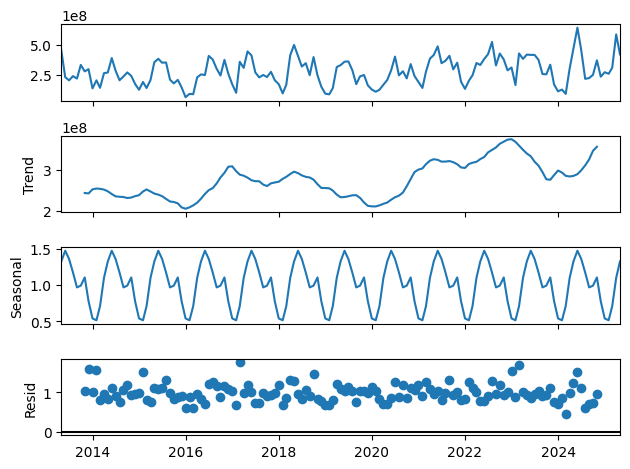

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
data['Fecha'] = pd.to_datetime(data['Fecha'])
grouped_data = data.groupby(data['Fecha'].dt.to_period('M')).agg({
    'AportesHidricosEnergia': 'max',
    'PromedioAcumuladoEnergia': 'mean',
    'MediaHistoricaEnergia': 'mean'
   
}).reset_index()
grouped_data['Fecha'] = grouped_data['Fecha'].dt.to_timestamp()
decomposition = seasonal_decompose(grouped_data[['Fecha','AportesHidricosEnergia']].set_index('Fecha'), model='multiplicative')
decomposition.plot()
plt.show()

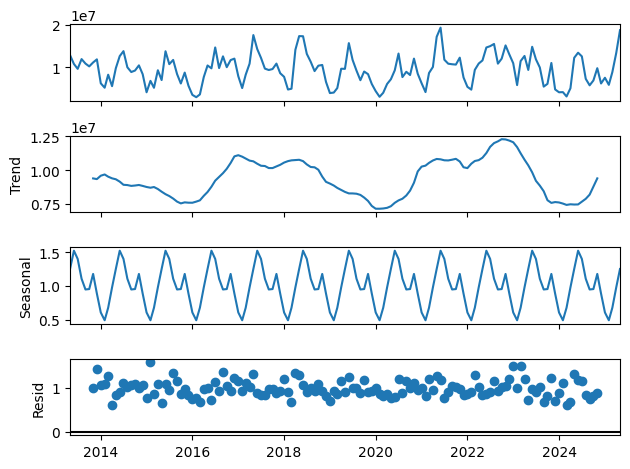

In [54]:
decomposition = seasonal_decompose(grouped_data[['Fecha','PromedioAcumuladoEnergia']].set_index('Fecha'), model='multiplicative')
decomposition.plot()
plt.show()

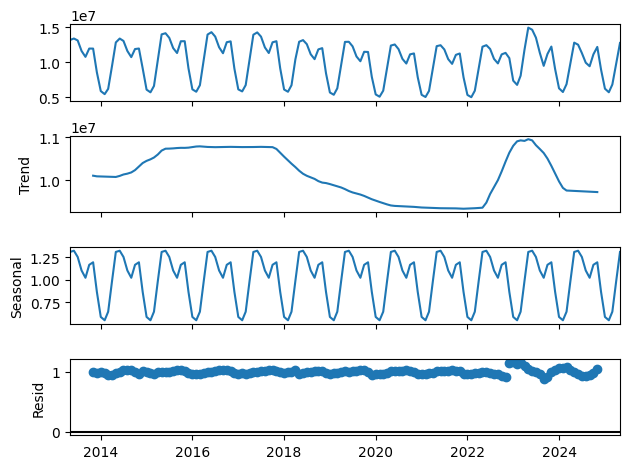

In [55]:
decomposition = seasonal_decompose(grouped_data[['Fecha','MediaHistoricaEnergia']].set_index('Fecha'), model='multiplicative')
decomposition.plot()
plt.show()